# California Traffic Collision Data Analysis

# Link for the Interactive Dashboard Using PowerBI: 

https://app.powerbi.com/view?r=eyJrIjoiNzA1YmJkN2ItYWE5OC00Nzc2LThjYTktZGZhOWZiNzcxNjRiIiwidCI6IjBiYmJhZTJmLWJmNzctNGRmOS1hZjVmLWM0YjlkNGQ3MTM3YiJ9

# Start of the Analysis

In [1]:
import numpy as np
import pandas as pd 
import sqlite3
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Create a SQL connection to our SQLite database
con = sqlite3.connect(r'D:\Disk_Drive\DocumentsBuckUp\360DigiDataScience\Exam_California_Crash\switrs.sqlite')

cur = con.cursor()

#parties_query = " SELECT * FROM parties WHERE case_id IN \
#(SELECT case_id FROM collisions WHERE motorcycle_collision == 1 or pedestrian_collision == 1 or bicycle_collision == 1 or truck_collision == 1)"

#victims_query = " SELECT * FROM victims WHERE case_id IN \
#(SELECT case_id FROM collisions WHERE motorcycle_collision == 1 or pedestrian_collision == 1 or bicycle_collision == 1 or truck_collision == 1)"

# Read the data
collisions1 = pd.read_sql_query("SELECT collision_date, pedestrian_collision, bicycle_collision, motorcycle_collision, truck_collision FROM collisions WHERE motorcycle_collision == 1 or pedestrian_collision == 1 or bicycle_collision == 1 or truck_collision == 1", con)
#parties1 = pd.read_sql_query(parties_query, con)
#victims1 = pd.read_sql_query(victims_query, con)

# Save the data as csv files
# collisions1.to_csv('collisions.csv',index=False)
# parties1.to_csv('parties.csv',index=False)
# victims1.to_csv('victims.csv',index=False)

con.close()

In [6]:
# Going to collect and convert data from SQL to DataFrame 
df_pedestrian_collision = collisions1[['collision_date','pedestrian_collision']]
df_bicycle_collision = collisions1[['collision_date','bicycle_collision']]
df_motorcycle_collision = collisions1[['collision_date', 'motorcycle_collision']]
df_truck_collision = collisions1[['collision_date','truck_collision']]

In [7]:
# Getting the total collision happened by adding the pedestrian_collision, bicycle_collision,
# motorcycle_collision, and truck collition
df_total_collision = pd.DataFrame(collisions1['pedestrian_collision'] + collisions1['bicycle_collision'] + collisions1['motorcycle_collision']+ collisions1['truck_collision'])
df_total_collision ['collision_date'] = collisions1['collision_date']
df_total_collision = df_total_collision.rename(columns={0: 'Total_Collision'})

In [9]:
# Covert the date to Month and Year only - The analysts used this method to aviod missed days.
df_pedestrian_collision['collision_date'] = pd.to_datetime(collisions1.collision_date).dt.to_period('m')
df_bicycle_collision['collision_date'] = pd.to_datetime(collisions1.collision_date).dt.to_period('m')
df_motorcycle_collision['collision_date'] = pd.to_datetime(collisions1.collision_date).dt.to_period('m')
df_truck_collision['collision_date'] = pd.to_datetime(collisions1.collision_date).dt.to_period('m')
df_total_collision['collision_date'] = pd.to_datetime(collisions1.collision_date).dt.to_period('m')

C:\Users\ASHNER_NOVILLA\anaconda3\envs\tensorgpu\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ASHNER_NOVILLA\anaconda3\envs\tensorgpu\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ASHNER_NOVILLA\anaconda3\envs\tensorgpu\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [10]:
# Group the Collision Every Month from 2001 to 2021 a total of 246 Data Points
grp_pedestrian_collision = df_pedestrian_collision.groupby(['collision_date']).sum()
grp_bicycle_collision = df_bicycle_collision.groupby(['collision_date']).sum()
grp_motorcycle_collision = df_motorcycle_collision.groupby(['collision_date']).sum()
grp_truck_collision = df_truck_collision.groupby(['collision_date']).sum()
grp_total_collision = df_total_collision.groupby(['collision_date']).sum()

In [12]:
# Checking if the months are complete by getting the shape
print(grp_total_collision.head()) # We can notice here that the the date start on 2001-01
print(grp_total_collision.tail()) # We can notice here that the the date ends on 2021-06
print (grp_total_collision.shape) # We can notice that we have 246 Months and therefore we have a complete data for months from 2001-01 to 2021-06

                Total_Collision
collision_date                 
2001-01                    5631
2001-02                    5013
2001-03                    6057
2001-04                    5792
2001-05                    6418
                Total_Collision
collision_date                 
2021-02                    3847
2021-03                    4459
2021-04                    4176
2021-05                    2567
2021-06                      17
(246, 1)


<AxesSubplot:xlabel='collision_date'>

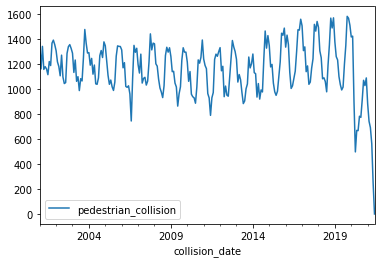

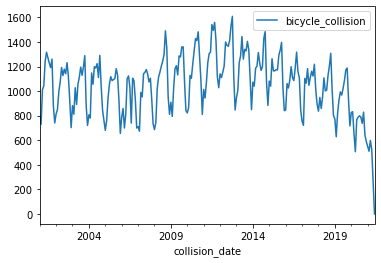

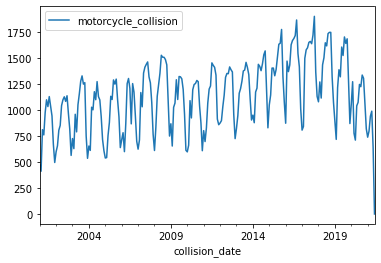

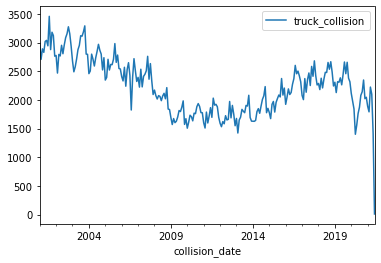

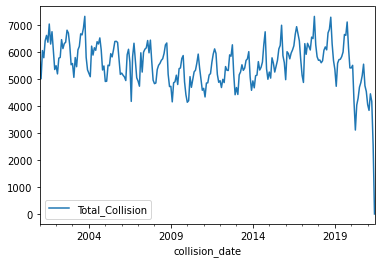

In [13]:
# Plot the collitions to see the trend
grp_pedestrian_collision.plot()
grp_bicycle_collision.plot()
grp_motorcycle_collision.plot()
grp_truck_collision.plot()
grp_total_collision.plot()

In [14]:
# This is the start of Statistical Analysis
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import mse
from statsmodels.tsa.stattools import adfuller

def mean_absolute_percentage_error(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred)/y_true))*100
    return mape

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    if dftest[0] < dftest[4]["10%"]:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [15]:
# Checking if the Data is Stationary or Non Stationary Using ADFuller 
# Apply adf test on the series
collision_variables = [grp_pedestrian_collision, grp_bicycle_collision, grp_motorcycle_collision, grp_truck_collision, grp_total_collision]
collision_strings = ['pedestrian_collision_train', 'bicycle_collision_train', 'motorcycle_collision_train', 'truck_collision_train', 'total_collision_train']

for x, y in zip (collision_variables, collision_strings):
    print (y)
    adf = adf_test(x) 

# We will notice that even at 10% Critical Values our Test Statistic is still greater.
# Therefore we reject the null hypothesis and state that its a Non-Stationary Dataset
# Converting it to Stationary is recommended before performing forecasting

pedestrian_collision_train
Results of Dickey-Fuller Test:
Test Statistic                  -1.136733
p-value                          0.700203
#Lags Used                      15.000000
Number of Observations Used    230.000000
Critical Value (1%)             -3.459106
Critical Value (5%)             -2.874190
Critical Value (10%)            -2.573512
dtype: float64
Failed to Reject Ho - Time Series is Non-Stationary
bicycle_collision_train
Results of Dickey-Fuller Test:
Test Statistic                   1.545743
p-value                          0.997685
#Lags Used                      15.000000
Number of Observations Used    230.000000
Critical Value (1%)             -3.459106
Critical Value (5%)             -2.874190
Critical Value (10%)            -2.573512
dtype: float64
Failed to Reject Ho - Time Series is Non-Stationary
motorcycle_collision_train
Results of Dickey-Fuller Test:
Test Statistic                  -1.253744
p-value                          0.650060
#Lags Used             

In [16]:
# Going to convert Period to DateTime Format (This is also not required but for documentation purpose)
# Index reset for train test split
grp_pedestrian_collision.reset_index(inplace=True)
grp_bicycle_collision.reset_index(inplace=True)
grp_motorcycle_collision.reset_index(inplace=True)
grp_truck_collision.reset_index(inplace=True)
grp_total_collision.reset_index(inplace=True)

# periods as string (additional conversion for future reference)
grp_pedestrian_collision['collision_date'] = [d.strftime('%Y-%m') for d in grp_pedestrian_collision['collision_date']]
grp_bicycle_collision['collision_date'] = [d.strftime('%Y-%m') for d in grp_bicycle_collision['collision_date']]
grp_motorcycle_collision['collision_date'] = [d.strftime('%Y-%m') for d in grp_motorcycle_collision['collision_date']]
grp_truck_collision['collision_date'] = [d.strftime('%Y-%m') for d in grp_truck_collision['collision_date']]
grp_total_collision['collision_date'] = [d.strftime('%Y-%m') for d in grp_total_collision['collision_date']]

grp_pedestrian_collision = grp_pedestrian_collision.set_index('collision_date')
grp_bicycle_collision = grp_bicycle_collision.set_index('collision_date')
grp_motorcycle_collision = grp_motorcycle_collision.set_index('collision_date')
grp_truck_collision = grp_truck_collision.set_index('collision_date')
grp_total_collision = grp_total_collision.set_index('collision_date')


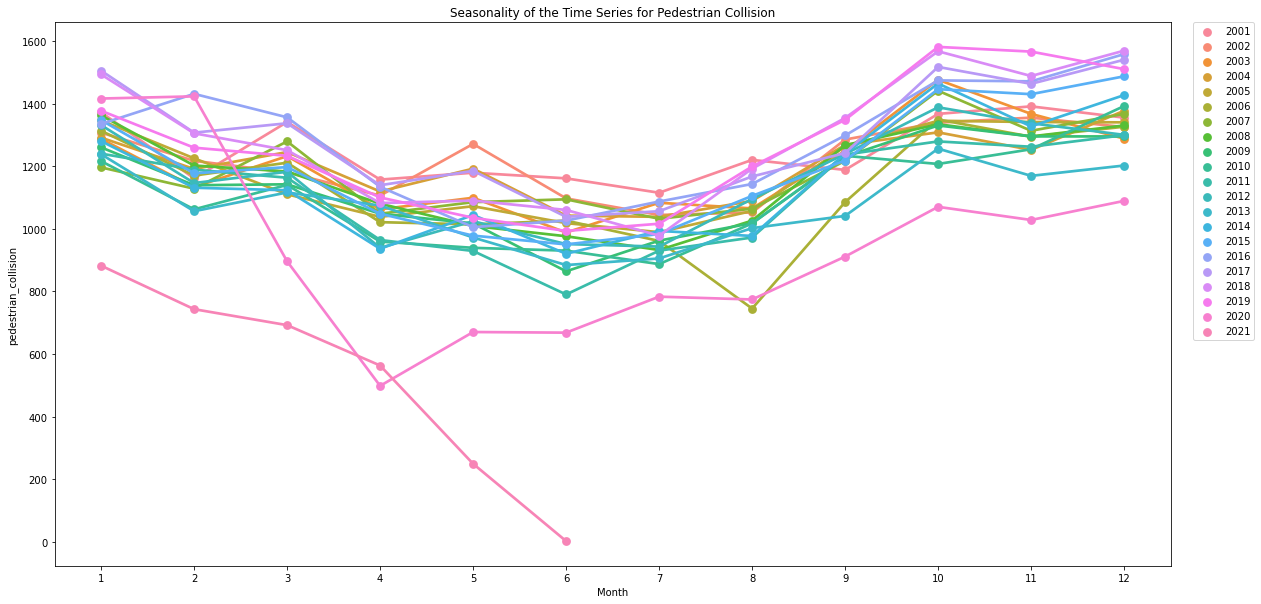

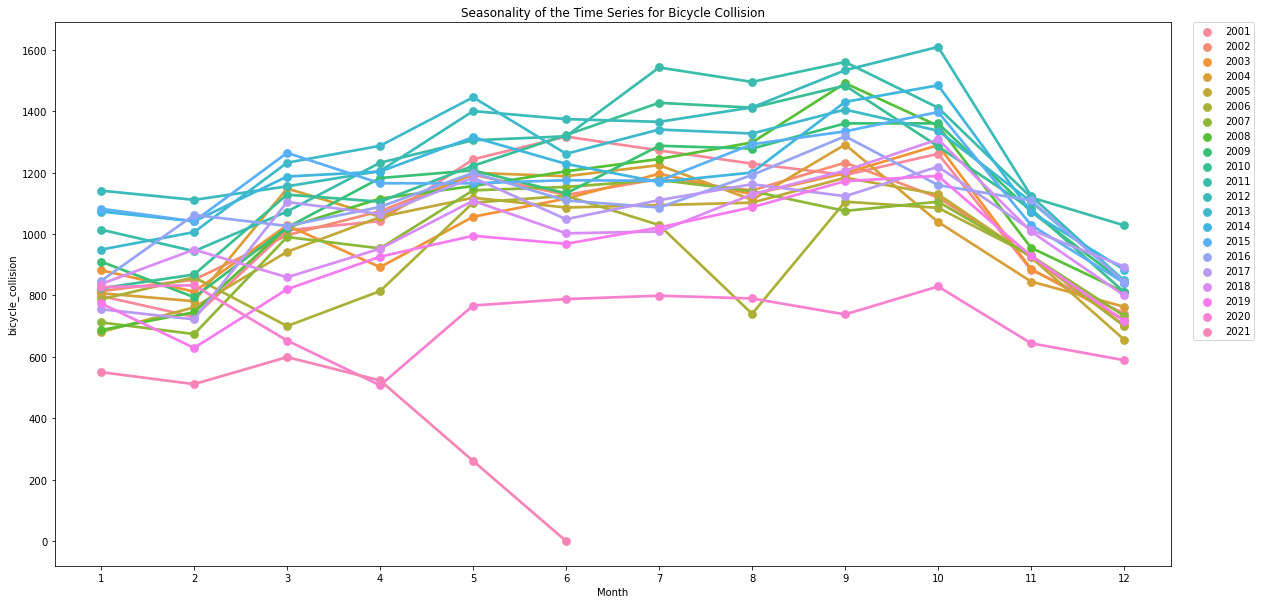

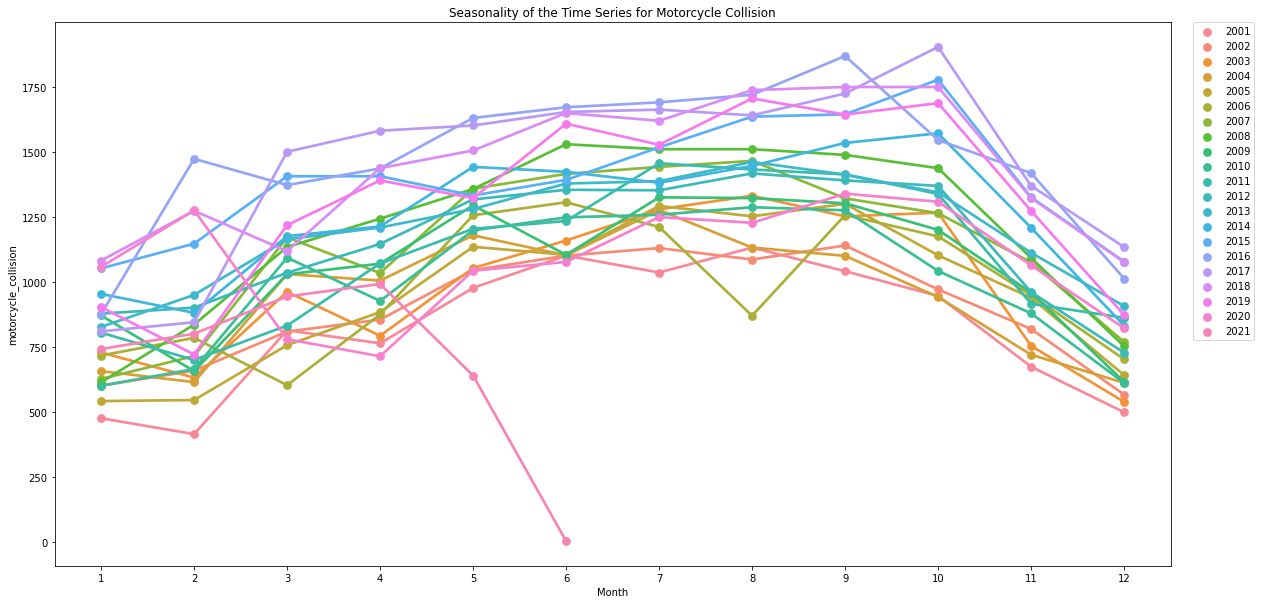

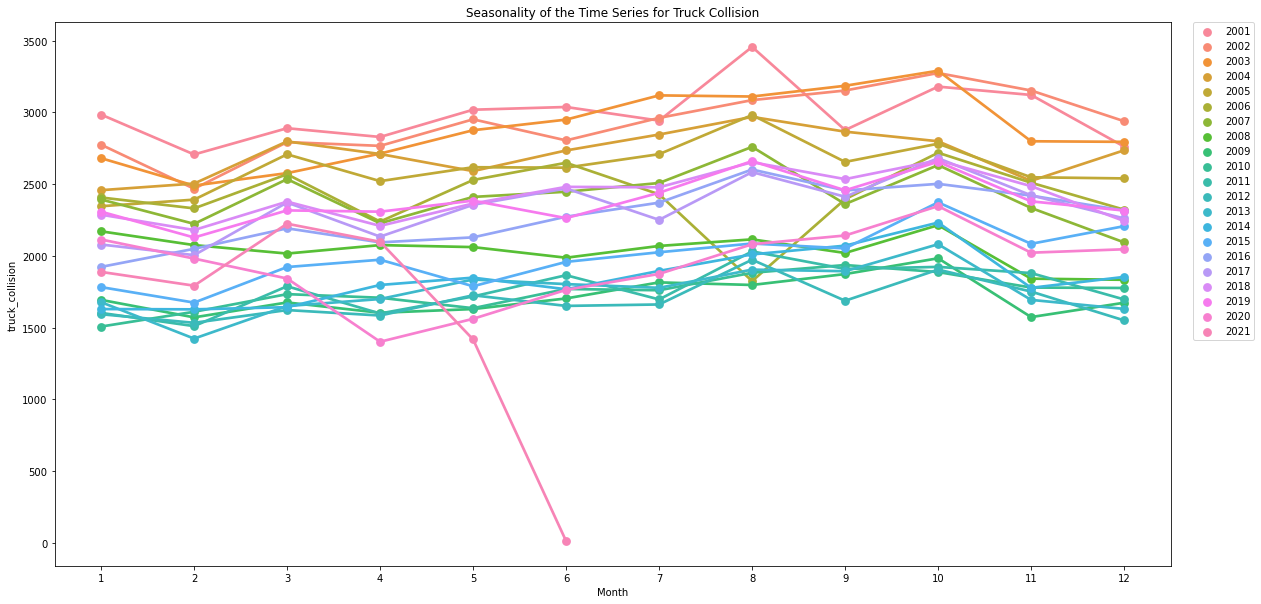

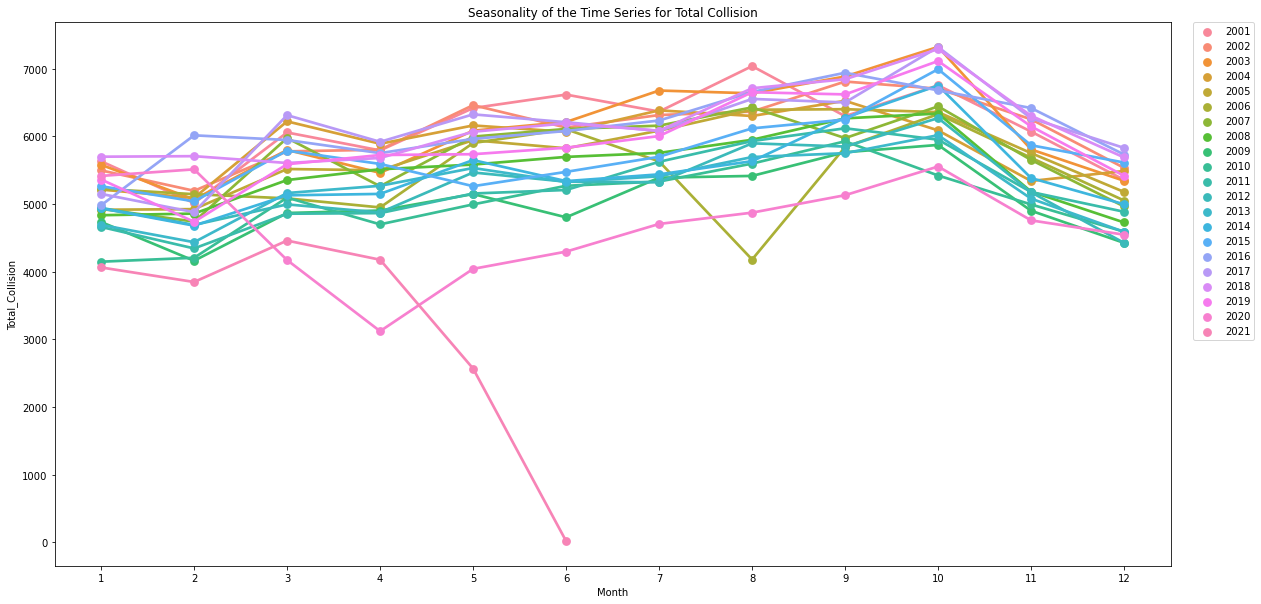

In [17]:
# Plotting the the number of collision per month of each year. This visual analysis if there is a seasonality
grp_pedestrian_collision['Year'] = pd.DatetimeIndex(grp_pedestrian_collision.index).year
grp_pedestrian_collision['Month'] = pd.DatetimeIndex(grp_pedestrian_collision.index).month

plt.figure(figsize=(20,10))
plt.title('Seasonality of the Time Series for Pedestrian Collision')
sns.pointplot(x='Month',y='pedestrian_collision',hue='Year',data=grp_pedestrian_collision)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

grp_bicycle_collision['Year'] = pd.DatetimeIndex(grp_bicycle_collision.index).year
grp_bicycle_collision['Month'] = pd.DatetimeIndex(grp_bicycle_collision.index).month

plt.figure(figsize=(20,10))
plt.title('Seasonality of the Time Series for Bicycle Collision')
sns.pointplot(x='Month',y='bicycle_collision',hue='Year',data=grp_bicycle_collision)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

grp_motorcycle_collision['Year'] = pd.DatetimeIndex(grp_motorcycle_collision.index).year
grp_motorcycle_collision['Month'] = pd.DatetimeIndex(grp_motorcycle_collision.index).month

plt.figure(figsize=(20,10))
plt.title('Seasonality of the Time Series for Motorcycle Collision')
sns.pointplot(x='Month',y='motorcycle_collision',hue='Year',data=grp_motorcycle_collision)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

grp_truck_collision['Year'] = pd.DatetimeIndex(grp_truck_collision.index).year
grp_truck_collision['Month'] = pd.DatetimeIndex(grp_truck_collision.index).month

plt.figure(figsize=(20,10))
plt.title('Seasonality of the Time Series for Truck Collision')
sns.pointplot(x='Month',y='truck_collision',hue='Year',data=grp_truck_collision)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

grp_total_collision['Year'] = pd.DatetimeIndex(grp_total_collision.index).year
grp_total_collision['Month'] = pd.DatetimeIndex(grp_total_collision.index).month

plt.figure(figsize=(20,10))
plt.title('Seasonality of the Time Series for Total Collision')
sns.pointplot(x='Month',y='Total_Collision',hue='Year',data=grp_total_collision)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

# We can notice on the plot that there is a significant drop of Pedestian Collision and Bicycle Collision 
# During the 1st or 2nd Month of Pandemic

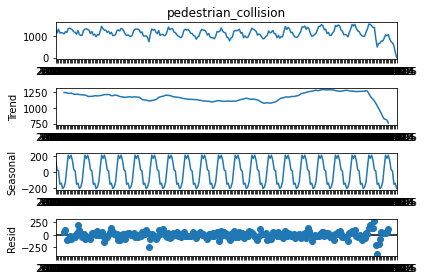

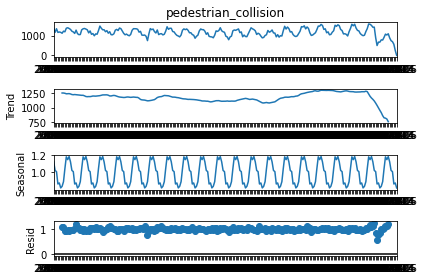

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

s_dec_additive = seasonal_decompose(grp_pedestrian_collision ['pedestrian_collision'], period=12, model="additive").plot()
s_dec_multiplicative = seasonal_decompose(grp_pedestrian_collision ['pedestrian_collision'], period=12, model="multiplicative").plot()
# From the Seasonal Decompse we can observe the Season and Trend
# Based on the analysis we can observed that the Pedestrian Collision dataset is Additive in Nature 
# as the ResID is lying in 0.
# There is no significant Season for the Pedestrian Collision dataset

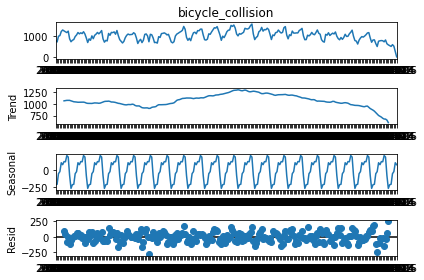

In [29]:
s_dec_additive = seasonal_decompose(grp_bicycle_collision ['bicycle_collision'], period=12, model="additive").plot()
# Based on the analysis we can observed that the  Bicycle Collision dataset is Additive in Nature 
# as the ResID is lying in 0.

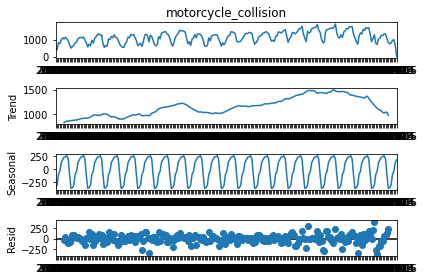

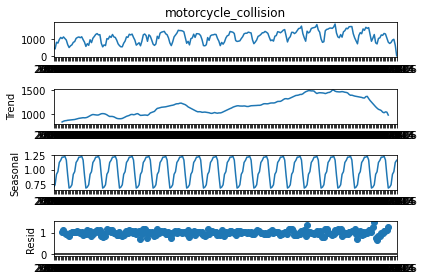

In [30]:
s_dec_additive = seasonal_decompose(grp_motorcycle_collision ['motorcycle_collision'], period=12, model="additive").plot()
s_dec_multiplicative = seasonal_decompose(grp_motorcycle_collision ['motorcycle_collision'], period=12, model="multiplicative").plot()
# Based on the analysis we can observed that the Motorcycle Collision dataset is Additive in Nature 
# as the ResID is lying in 0 as compared to multiplicative.
# Trend can be properly observed

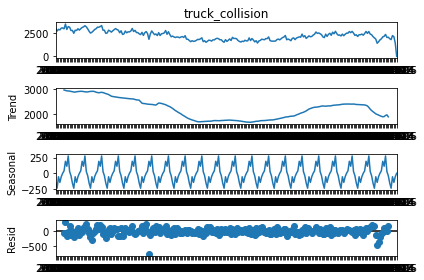

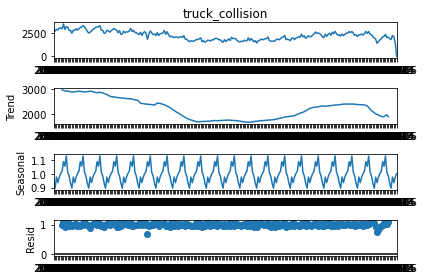

In [31]:
s_dec_additive = seasonal_decompose(grp_truck_collision ['truck_collision'], period=12, model="additive").plot()
s_dec_multiplicative = seasonal_decompose(grp_truck_collision ['truck_collision'], period=12, model="multiplicative").plot()
# Based on the analysis we can observed that the truck collision dataset is Additive in Nature 
# as the ResID is lying in 0 as compared to multiplicative.
# Trend can be properly observed
# It can observe that there might be a season for truck collision 

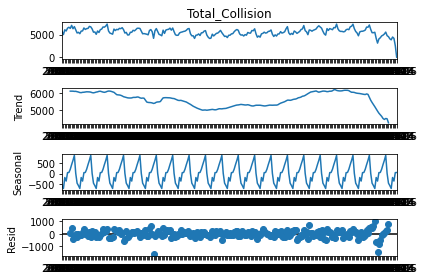

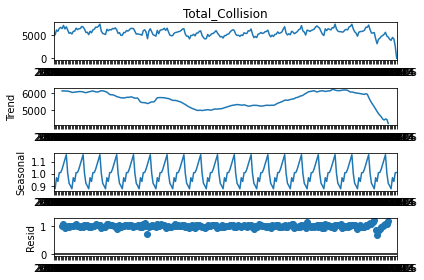

In [33]:
s_dec_additive = seasonal_decompose(grp_total_collision ['Total_Collision'], period=12, model="additive").plot()
s_dec_multiplicative = seasonal_decompose(grp_total_collision ['Total_Collision'], period=12, model="multiplicative").plot()
# It can be observe that the total dataset for collition which includes the pedestrian, 
# motorcycle, bicycle, and truck collsion is Additive 
# Using this plot the data can easily be analyze on whether the dataset has a seasonality 
# and the trend of data

In [34]:
# Imputing incomplete data, the Analysts decides to impute the data from May and July 2021 
# since its not complete 
#(It is recommended to try other imputation method such as mean imputation, mode imputation and 
#  median imputation for further analysis).

grp_pedestrian_collision_filtered = grp_pedestrian_collision.drop(grp_pedestrian_collision[(grp_pedestrian_collision['Year'] == 2021) & (grp_pedestrian_collision['Month'] > 4)].index)
grp_bicycle_collision_filtered = grp_bicycle_collision.drop(grp_bicycle_collision[(grp_bicycle_collision['Year'] == 2021) & (grp_bicycle_collision['Month'] > 4)].index)
grp_motorcycle_collision_filtered = grp_motorcycle_collision.drop(grp_motorcycle_collision[(grp_motorcycle_collision['Year'] == 2021) & (grp_motorcycle_collision['Month'] > 4)].index)
grp_truck_collision_filtered = grp_truck_collision.drop(grp_truck_collision[(grp_truck_collision['Year'] == 2021) & (grp_truck_collision['Month'] > 4)].index)
grp_total_collision_filtered = grp_total_collision.drop(grp_total_collision[(grp_total_collision['Year'] == 2021) & (grp_total_collision['Month'] > 4)].index)

In [35]:
# Next Step is to convert the dataset to Stationary Dataset
# The method used is Differencing  - The purpose of differencing it to make the time series stationary.
# In the dataset only a period of 1 is used for differencing

Results of Dickey-Fuller Test:
Test Statistic                  -2.872220
p-value                          0.048675
#Lags Used                      14.000000
Number of Observations Used    228.000000
Critical Value (1%)             -3.459361
Critical Value (5%)             -2.874302
Critical Value (10%)            -2.573571
dtype: float64
Reject Ho - Time Series is Stationary


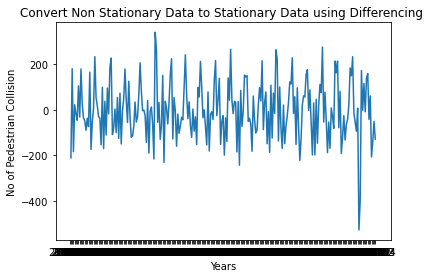

In [36]:
diff_pedestrian_collision = grp_pedestrian_collision_filtered.diff(periods = 1) 
plt.xlabel('Years')
plt.ylabel('No of Pedestrian Collision')    
plt.title('Convert Non Stationary Data to Stationary Data using Differencing ')
plt.plot(diff_pedestrian_collision['pedestrian_collision'])

diff_pedestrian_collision.dropna(inplace=True)
adf = adf_test(diff_pedestrian_collision['pedestrian_collision']) 
# It can be observed that Test Statisctic < Critical Value (5%)
# It can be said that the pedestrian_collision dataset is stationary with Confidence Interval of 95%

Results of Dickey-Fuller Test:
Test Statistic                  -4.064142
p-value                          0.001109
#Lags Used                      14.000000
Number of Observations Used    228.000000
Critical Value (1%)             -3.459361
Critical Value (5%)             -2.874302
Critical Value (10%)            -2.573571
dtype: float64
Reject Ho - Time Series is Stationary


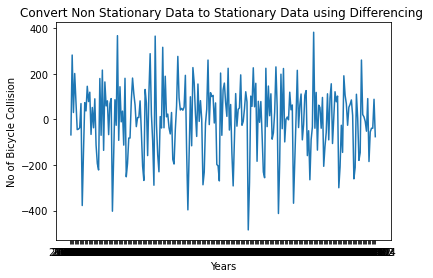

In [37]:
diff_bicycle_collision = grp_bicycle_collision_filtered.diff(periods = 1)
plt.xlabel('Years')
plt.ylabel('No of Bicycle Collision')    
plt.title('Convert Non Stationary Data to Stationary Data using Differencing ')
plt.plot(diff_bicycle_collision['bicycle_collision'])

diff_bicycle_collision.dropna(inplace=True)
adf = adf_test(diff_bicycle_collision['bicycle_collision'])
# It can be observed that Test Statisctic < Critical Value (1%)
# It can be said that the bicycle_collision dataset is stationary with Confidence Interval of 99%

Results of Dickey-Fuller Test:
Test Statistic                  -4.588133
p-value                          0.000136
#Lags Used                      13.000000
Number of Observations Used    229.000000
Critical Value (1%)             -3.459233
Critical Value (5%)             -2.874245
Critical Value (10%)            -2.573541
dtype: float64
Reject Ho - Time Series is Stationary


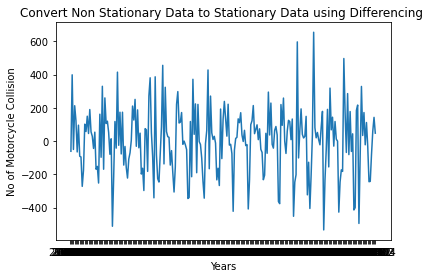

In [38]:
diff_motorcycle_collision = grp_motorcycle_collision_filtered.diff(periods = 1)
plt.xlabel('Years')
plt.ylabel('No of Motorcycle Collision')    
plt.title('Convert Non Stationary Data to Stationary Data using Differencing ')
plt.plot(diff_motorcycle_collision['motorcycle_collision'])

diff_motorcycle_collision.dropna(inplace=True)
adf = adf_test(diff_motorcycle_collision['motorcycle_collision'])
# It can be observed that Test Statisctic < Critical Value (1%)
# It can be said that the bicycle_collision dataset is stationary with Confidence Interval of 99%

Results of Dickey-Fuller Test:
Test Statistic                  -3.232431
p-value                          0.018183
#Lags Used                      14.000000
Number of Observations Used    228.000000
Critical Value (1%)             -3.459361
Critical Value (5%)             -2.874302
Critical Value (10%)            -2.573571
dtype: float64
Reject Ho - Time Series is Stationary


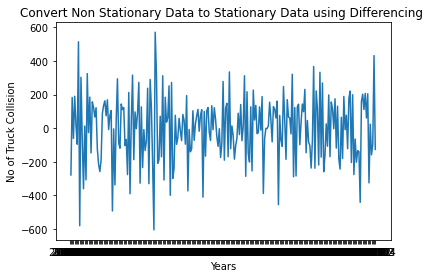

In [39]:
diff_truck_collision_filtered = grp_truck_collision_filtered.diff(periods = 1)
plt.xlabel('Years')
plt.ylabel('No of Truck Collision')    
plt.title('Convert Non Stationary Data to Stationary Data using Differencing ')
plt.plot(diff_truck_collision_filtered['truck_collision'])

diff_truck_collision_filtered.dropna(inplace=True)
adf = adf_test(diff_truck_collision_filtered['truck_collision']) 

# It can be observed that Test Statisctic < Critical Value (5%)
# It can be said that the truck_collision dataset is stationary with Confidence Interval of 95%

Results of Dickey-Fuller Test:
Test Statistic                  -3.978911
p-value                          0.001525
#Lags Used                      15.000000
Number of Observations Used    227.000000
Critical Value (1%)             -3.459490
Critical Value (5%)             -2.874358
Critical Value (10%)            -2.573602
dtype: float64
Reject Ho - Time Series is Stationary


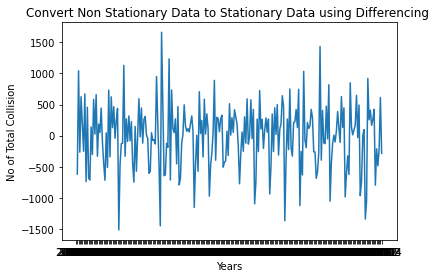

In [40]:
diff_total_collision = grp_total_collision_filtered.diff(periods = 1)
plt.xlabel('Years')
plt.ylabel('No of Total Collision')    
plt.title('Convert Non Stationary Data to Stationary Data using Differencing ')
plt.plot(diff_total_collision['Total_Collision'])

diff_total_collision.dropna(inplace=True)
adf = adf_test(diff_total_collision['Total_Collision'])

# It can be observed that Test Statisctic < Critical Value (5%)
# It can be said that the the total collision dataset is stationary with Confidence Interval of 95%

In [43]:
# Splitting the Dataset to Train and Test

train_test_var = int((len(diff_total_collision) * 0.75)) 
#We're getting the 75% as a train variable and 25% as test variable: 
#Please note that the lenght for all the collision is same.


# Pedestrian Collision Variable
pedestrian_collision_train = diff_pedestrian_collision.iloc[0:train_test_var,0:1]
pedestrian_collision_test = diff_pedestrian_collision.iloc[train_test_var::,0:1]

# Bicycle Collision Variable
bicycle_collision_train = diff_bicycle_collision.iloc[0:train_test_var,0:1]
bicycle_collision_test = diff_bicycle_collision.iloc[train_test_var::,0:1]

# Motorcycle Collision Variable
motorcycle_collision_train = diff_motorcycle_collision.iloc[0:train_test_var,0:1]
motorcycle_collision_test =  diff_motorcycle_collision.iloc[train_test_var::,0:1]

# Truck Collision Variable
truck_collision_train = diff_truck_collision_filtered.iloc[0:train_test_var,0:1]
truck_collision_test = diff_truck_collision_filtered.iloc[train_test_var::,0:1]

# Total Collision Variable
total_collision_train = diff_total_collision.iloc[0:train_test_var,0:1]
total_collision_test = diff_total_collision.iloc[train_test_var::,0:1]

In [45]:
# Forcasting using Auto Regression
from statsmodels.tsa.ar_model import AutoReg

# Pedestrian Collision Prediction

In [48]:
## pedestrian_collision Prediction
AutoReg_model_Predestrian = AutoReg(pedestrian_collision_train['pedestrian_collision'], lags=12)
AutoReg_model_Predestrian_fit = AutoReg_model_Predestrian.fit()

# make prediction
AutoReg_Pedestrain_yhat = AutoReg_model_Predestrian_fit.predict(len(pedestrian_collision_train['pedestrian_collision']), len(pedestrian_collision_train['pedestrian_collision'])+len(pedestrian_collision_test['pedestrian_collision'])-1)

AutoReg_Pedestrain_yhat = AutoReg_Pedestrain_yhat.to_frame()
AutoReg_Pedestrain_yhat = AutoReg_Pedestrain_yhat.rename(columns={0 : 'pedestrian_collision'})
AutoReg_Pedestrain_yhat.reset_index(inplace=True)
AutoReg_Pedestrain_yhat['collision_date'] = [d.strftime('%Y-%m') for d in AutoReg_Pedestrain_yhat['index']]
AutoReg_Pedestrain_yhat = AutoReg_Pedestrain_yhat[['collision_date','pedestrian_collision']].set_index('collision_date')

print(AutoReg_Pedestrain_yhat)
# As seen the predicted values are not yet revert to inverse difference

                pedestrian_collision
collision_date                      
2016-04                  -218.427955
2016-05                  -109.960111
2016-06                   -53.694511
2016-07                    23.429463
2016-08                   110.211235
...                              ...
2020-12                    66.895046
2021-01                     8.843354
2021-02                   -46.141246
2021-03                   -94.939966
2021-04                  -115.107523

[61 rows x 1 columns]


C:\Users\ASHNER_NOVILLA\anaconda3\envs\tensorgpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASHNER_NOVILLA\anaconda3\envs\tensorgpu\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
C:\Users\ASHNER_NOVILLA\anaconda3\envs\tensorgpu\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


In [49]:
#Reverse the Actual Result
pedestrian_collision_test['reverse_diff_actual'] = grp_pedestrian_collision_filtered['pedestrian_collision'].shift(1) + pedestrian_collision_test['pedestrian_collision']

#Reverse the Predicted Result
#Get the Initail Number of the original dataset for cummulative sum to reverse difference method
pedestran_collision_cum_initial_number = pd.DataFrame(grp_pedestrian_collision_filtered.iloc[train_test_var::,0:1]['pedestrian_collision'].head(1))

df = pd.concat([pedestran_collision_cum_initial_number, AutoReg_Pedestrain_yhat])
df['pedestrian_collision'] = round(df['pedestrian_collision'].cumsum())

#Combine the Actual and Predicted and remove unused column and dataframe
pedestrian_collision_test['reverse_diff_pred'] = df['pedestrian_collision']
pedestrian_collision_test = pedestrian_collision_test[['reverse_diff_actual', 'reverse_diff_pred']]
del(df)

In [50]:
# Getting the MAPE -> Mean Absolute Percentage Error
# The mean absolute percentage error (MAPE) is the most common measure used to forecast error, a
#  nd works best if there are no extremes to the data (and no zeros).
mean_absolute_percentage_error(pedestrian_collision_test['reverse_diff_actual'], pedestrian_collision_test['reverse_diff_pred'])

18.613730657120612

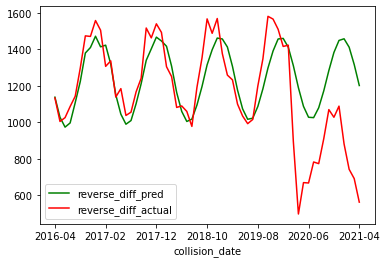

In [51]:
pedestrian_collision_test['reverse_diff_pred'].plot(color='green')
pedestrian_collision_test['reverse_diff_actual'].plot(color='red')
plt.legend(["reverse_diff_pred", "reverse_diff_actual"]);
#We can observed on the plot that Months the are greatly affected by covid deviate from the forecasted value

In [59]:
# Forecasting for 12 Months
month_forecast = 12

AutoReg_Pedestrain_yhat = AutoReg_model_Predestrian_fit.predict(len(pedestrian_collision_train.index), len(pedestrian_collision_train.index)+len(pedestrian_collision_test.index)+ month_forecast-1)
AutoReg_Pedestrain_yhat = AutoReg_Pedestrain_yhat.to_frame()
AutoReg_Pedestrain_yhat = AutoReg_Pedestrain_yhat.rename(columns={0 : 'pedestrian_collision'})
AutoReg_Pedestrain_yhat.reset_index(inplace=True)
AutoReg_Pedestrain_yhat['collision_date'] = [d.strftime('%Y-%m') for d in AutoReg_Pedestrain_yhat['index']]
AutoReg_Pedestrain_yhat = AutoReg_Pedestrain_yhat[['collision_date','pedestrian_collision']].set_index('collision_date')

AutoReg_Pedestrain_yhat = pd.concat([pedestran_collision_cum_initial_number, AutoReg_Pedestrain_yhat])
AutoReg_Pedestrain_yhat['pedestrian_collision'] = round(AutoReg_Pedestrain_yhat['pedestrian_collision'].cumsum())

print(AutoReg_Pedestrain_yhat)

                pedestrian_collision
collision_date                      
2016-03                       1356.0
2016-04                       1138.0
2016-05                       1028.0
2016-06                        974.0
2016-07                        997.0
...                              ...
2021-12                       1441.0
2022-01                       1455.0
2022-02                       1413.0
2022-03                       1324.0
2022-04                       1214.0

[74 rows x 1 columns]


C:\Users\ASHNER_NOVILLA\anaconda3\envs\tensorgpu\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


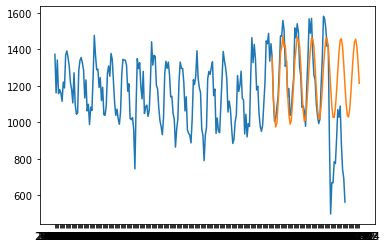

In [62]:
plt.plot(grp_pedestrian_collision_filtered['pedestrian_collision'])
plt.plot(AutoReg_Pedestrain_yhat['pedestrian_collision'])

# Bicycle Collision Prediction

In [63]:
## bicycle_collision Prediction
AutoReg_model_Bicycle = AutoReg(bicycle_collision_train['bicycle_collision'], lags=12)
AutoReg_model_Bicycle_fit = AutoReg_model_Bicycle.fit()

# make prediction
AutoReg_Bicycle_yhat = AutoReg_model_Bicycle_fit.predict(len(bicycle_collision_train['bicycle_collision']), len(bicycle_collision_train['bicycle_collision'])+len(bicycle_collision_test['bicycle_collision'])-1)

AutoReg_Bicycle_yhat = AutoReg_Bicycle_yhat.to_frame()
AutoReg_Bicycle_yhat = AutoReg_Bicycle_yhat.rename(columns={0 : 'bicycle_collision'})
AutoReg_Bicycle_yhat.reset_index(inplace=True)
AutoReg_Bicycle_yhat['collision_date'] = [d.strftime('%Y-%m') for d in AutoReg_Bicycle_yhat['index']]
AutoReg_Bicycle_yhat = AutoReg_Bicycle_yhat[['collision_date','bicycle_collision']].set_index('collision_date')

print(AutoReg_Bicycle_yhat)
# As seen the predicted values are not yet revert to inverse difference

                bicycle_collision
collision_date                   
2016-04                 78.355567
2016-05                  4.294821
2016-06                 67.056947
2016-07                 23.219944
2016-08                 97.452934
...                           ...
2020-12                -66.312133
2021-01                -25.777537
2021-02                 13.868928
2021-03                 17.202522
2021-04                 16.167313

[61 rows x 1 columns]


C:\Users\ASHNER_NOVILLA\anaconda3\envs\tensorgpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASHNER_NOVILLA\anaconda3\envs\tensorgpu\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
C:\Users\ASHNER_NOVILLA\anaconda3\envs\tensorgpu\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


In [65]:
#Reverse the Actual Result
bicycle_collision_test['reverse_diff_actual'] = grp_bicycle_collision_filtered['bicycle_collision'].shift(1) + bicycle_collision_test['bicycle_collision']

#Reverse the Predicted Result
#Get the Initail Number of the original dataset for cummulative sum to reverse difference method
bicycle_collision_cum_initial_number = pd.DataFrame(grp_bicycle_collision_filtered.iloc[train_test_var::,0:1]['bicycle_collision'].head(1))

df = pd.concat([bicycle_collision_cum_initial_number, AutoReg_Bicycle_yhat])
df['bicycle_collision'] = round(df['bicycle_collision'].cumsum())

#Combine the Actual and Predicted and remove unused column and dataframe
bicycle_collision_test['reverse_diff_pred'] = df['bicycle_collision']
bicycle_collision_test = bicycle_collision_test[['reverse_diff_actual', 'reverse_diff_pred']]
del(df)

In [66]:
# Getting the MAPE -> Mean Absolute Percentage Error
# The mean absolute percentage error (MAPE) is the most common measure used to forecast error, a
#  nd works best if there are no extremes to the data (and no zeros).
mean_absolute_percentage_error(bicycle_collision_test['reverse_diff_actual'], bicycle_collision_test['reverse_diff_pred'])

28.1139613508806

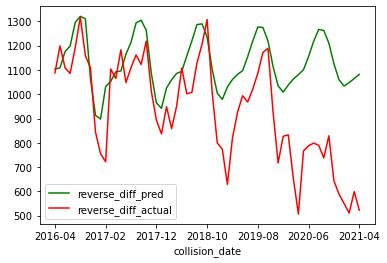

In [67]:
bicycle_collision_test['reverse_diff_pred'].plot(color='green')
bicycle_collision_test['reverse_diff_actual'].plot(color='red')
plt.legend(["reverse_diff_pred", "reverse_diff_actual"]);
#We can observed on the plot that Months the are greatly affected by covid deviate from the forecasted value

In [68]:
# Forecasting for 12 Months
month_forecast = 12

AutoReg_Bicycle_yhat = AutoReg_model_Bicycle_fit.predict(len(bicycle_collision_train.index), len(bicycle_collision_train.index)+len(bicycle_collision_test.index)+ month_forecast-1)
AutoReg_Bicycle_yhat = AutoReg_Bicycle_yhat.to_frame()
AutoReg_Bicycle_yhat = AutoReg_Bicycle_yhat.rename(columns={0 : 'bicycle_collision'})
AutoReg_Bicycle_yhat.reset_index(inplace=True)
AutoReg_Bicycle_yhat['collision_date'] = [d.strftime('%Y-%m') for d in AutoReg_Bicycle_yhat['index']]
AutoReg_Bicycle_yhat = AutoReg_Bicycle_yhat[['collision_date','bicycle_collision']].set_index('collision_date')

AutoReg_Bicycle_yhat = pd.concat([bicycle_collision_cum_initial_number, AutoReg_Bicycle_yhat])
AutoReg_Bicycle_yhat['bicycle_collision'] = round(AutoReg_Bicycle_yhat['bicycle_collision'].cumsum())

print(AutoReg_Bicycle_yhat)

                bicycle_collision
collision_date                   
2016-03                    1026.0
2016-04                    1104.0
2016-05                    1109.0
2016-06                    1176.0
2016-07                    1199.0
...                           ...
2021-12                    1080.0
2022-01                    1055.0
2022-02                    1059.0
2022-03                    1070.0
2022-04                    1084.0

[74 rows x 1 columns]


C:\Users\ASHNER_NOVILLA\anaconda3\envs\tensorgpu\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


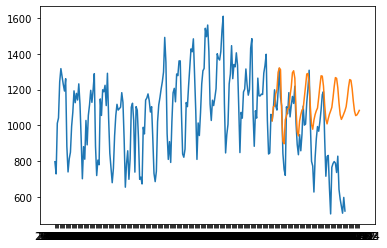

In [69]:
plt.plot(grp_bicycle_collision_filtered['bicycle_collision'])
plt.plot(AutoReg_Bicycle_yhat['bicycle_collision'])

# Motorcycle Collision Prediction

In [72]:
## motorcycle_collision Prediction
AutoReg_model_Motorcycle = AutoReg(motorcycle_collision_train['motorcycle_collision'], lags=12)
AutoReg_model_Motorcycle_fit = AutoReg_model_Motorcycle.fit()

# make prediction
AutoReg_Motorcycle_yhat = AutoReg_model_Motorcycle_fit.predict(len(motorcycle_collision_train['motorcycle_collision']), len(motorcycle_collision_train['motorcycle_collision'])+len(motorcycle_collision_test['motorcycle_collision'])-1)

AutoReg_Motorcycle_yhat = AutoReg_Motorcycle_yhat.to_frame()
AutoReg_Motorcycle_yhat = AutoReg_Motorcycle_yhat.rename(columns={0 : 'motorcycle_collision'})
AutoReg_Motorcycle_yhat.reset_index(inplace=True)
AutoReg_Motorcycle_yhat['collision_date'] = [d.strftime('%Y-%m') for d in AutoReg_Motorcycle_yhat['index']]
AutoReg_Motorcycle_yhat = AutoReg_Motorcycle_yhat[['collision_date','motorcycle_collision']].set_index('collision_date')

print(AutoReg_Motorcycle_yhat)
# As seen the predicted values are not yet revert to inverse difference


                motorcycle_collision
collision_date                      
2016-04                    72.570816
2016-05                  -150.480152
2016-06                   153.630020
2016-07                   125.918963
2016-08                   141.668083
...                              ...
2020-12                   -63.260141
2021-01                   -38.379388
2021-02                   -11.190732
2021-03                     0.511167
2021-04                    29.603111

[61 rows x 1 columns]


C:\Users\ASHNER_NOVILLA\anaconda3\envs\tensorgpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASHNER_NOVILLA\anaconda3\envs\tensorgpu\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
C:\Users\ASHNER_NOVILLA\anaconda3\envs\tensorgpu\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


In [73]:
#Reverse the Actual Result
motorcycle_collision_test['reverse_diff_actual'] = grp_motorcycle_collision_filtered['motorcycle_collision'].shift(1) + motorcycle_collision_test['motorcycle_collision']

#Reverse the Predicted Result
#Get the Initail Number of the original dataset for cummulative sum to reverse difference method
motorcycle_collision_cum_initial_number = pd.DataFrame(grp_motorcycle_collision_filtered.iloc[train_test_var::,0:1]['motorcycle_collision'].head(1))

df = pd.concat([motorcycle_collision_cum_initial_number, AutoReg_Motorcycle_yhat])
df['motorcycle_collision'] = round(df['motorcycle_collision'].cumsum())

#Combine the Actual and Predicted and remove unused column and dataframe
motorcycle_collision_test['reverse_diff_pred'] = df['motorcycle_collision']
motorcycle_collision_test = motorcycle_collision_test[['reverse_diff_actual', 'reverse_diff_pred']]
del(df)

In [74]:
# Getting the MAPE -> Mean Absolute Percentage Error
# The mean absolute percentage error (MAPE) is the most common measure used to forecast error, a
#  nd works best if there are no extremes to the data (and no zeros).
mean_absolute_percentage_error(motorcycle_collision_test['reverse_diff_actual'], motorcycle_collision_test['reverse_diff_pred'])

26.15616236331443

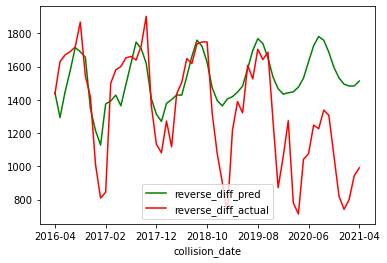

In [76]:
motorcycle_collision_test['reverse_diff_pred'].plot(color='green')
motorcycle_collision_test['reverse_diff_actual'].plot(color='red')
plt.legend(["reverse_diff_pred", "reverse_diff_actual"]);
#We can observed on the plot that Months the are greatly affected by covid deviate from the forecasted value

In [77]:
# Forecasting for 12 Months
month_forecast = 12

AutoReg_Motorcycle_yhat = AutoReg_model_Motorcycle_fit.predict(len(motorcycle_collision_train.index), len(motorcycle_collision_train.index)+len(motorcycle_collision_test.index)+ month_forecast-1)
AutoReg_Motorcycle_yhat = AutoReg_Motorcycle_yhat.to_frame()
AutoReg_Motorcycle_yhat = AutoReg_Motorcycle_yhat.rename(columns={0 : 'motorcycle_collision'})
AutoReg_Motorcycle_yhat.reset_index(inplace=True)
AutoReg_Motorcycle_yhat['collision_date'] = [d.strftime('%Y-%m') for d in AutoReg_Motorcycle_yhat['index']]
AutoReg_Motorcycle_yhat = AutoReg_Motorcycle_yhat[['collision_date','motorcycle_collision']].set_index('collision_date')

AutoReg_Motorcycle_yhat = pd.concat([motorcycle_collision_cum_initial_number, AutoReg_Motorcycle_yhat])
AutoReg_Motorcycle_yhat['motorcycle_collision'] = round(AutoReg_Motorcycle_yhat['motorcycle_collision'].cumsum())

print(AutoReg_Motorcycle_yhat)

                motorcycle_collision
collision_date                      
2016-03                       1372.0
2016-04                       1445.0
2016-05                       1294.0
2016-06                       1448.0
2016-07                       1574.0
...                              ...
2021-12                       1592.0
2022-01                       1549.0
2022-02                       1527.0
2022-03                       1525.0
2022-04                       1554.0

[74 rows x 1 columns]


C:\Users\ASHNER_NOVILLA\anaconda3\envs\tensorgpu\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


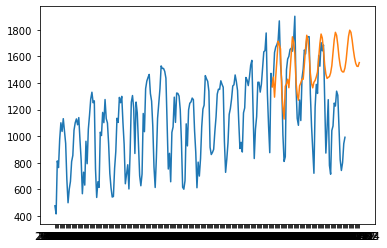

In [78]:
plt.plot(grp_motorcycle_collision_filtered['motorcycle_collision'])
plt.plot(AutoReg_Motorcycle_yhat['motorcycle_collision'])

# Truck Collision Prediction

In [79]:
## truck_collision Prediction
AutoReg_model_Truck = AutoReg(truck_collision_train['truck_collision'], lags=12)
AutoReg_model_Truck_fit = AutoReg_model_Truck.fit()

# make prediction
AutoReg_Truck_yhat = AutoReg_model_Truck_fit.predict(len(truck_collision_train['truck_collision']), len(truck_collision_train['truck_collision'])+len(truck_collision_test['truck_collision'])-1)

AutoReg_Truck_yhat = AutoReg_Truck_yhat.to_frame()
AutoReg_Truck_yhat = AutoReg_Truck_yhat.rename(columns={0 : 'truck_collision'})
AutoReg_Truck_yhat.reset_index(inplace=True)
AutoReg_Truck_yhat['collision_date'] = [d.strftime('%Y-%m') for d in AutoReg_Truck_yhat['index']]
AutoReg_Truck_yhat = AutoReg_Truck_yhat[['collision_date','truck_collision']].set_index('collision_date')

print(AutoReg_Truck_yhat)
# As seen the predicted values are not yet revert to inverse difference

                truck_collision
collision_date                 
2016-04             -173.740133
2016-05              -22.805718
2016-06               19.472026
2016-07               39.502827
2016-08               35.797460
...                         ...
2020-12               -5.119580
2021-01               -9.800589
2021-02               -5.403272
2021-03               -7.677671
2021-04               -3.678433

[61 rows x 1 columns]


C:\Users\ASHNER_NOVILLA\anaconda3\envs\tensorgpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASHNER_NOVILLA\anaconda3\envs\tensorgpu\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
C:\Users\ASHNER_NOVILLA\anaconda3\envs\tensorgpu\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


In [80]:
#Reverse the Actual Result
truck_collision_test['reverse_diff_actual'] = grp_truck_collision_filtered['truck_collision'].shift(1) + truck_collision_test['truck_collision']

#Reverse the Predicted Result
#Get the Initail Number of the original dataset for cummulative sum to reverse difference method
truck_collision_cum_initial_number = pd.DataFrame(grp_truck_collision_filtered.iloc[train_test_var::,0:1]['truck_collision'].head(1))

df = pd.concat([truck_collision_cum_initial_number, AutoReg_Truck_yhat])
df['truck_collision'] = round(df['truck_collision'].cumsum())

#Combine the Actual and Predicted and remove unused column and dataframe
truck_collision_test['reverse_diff_pred'] = df['truck_collision']
truck_collision_test = truck_collision_test[['reverse_diff_actual', 'reverse_diff_pred']]
del(df)

In [83]:
# Getting the MAPE -> Mean Absolute Percentage Error
# The mean absolute percentage error (MAPE) is the most common measure used to forecast error, a
#  nd works best if there are no extremes to the data (and no zeros).
mean_absolute_percentage_error(truck_collision_test['reverse_diff_actual'], truck_collision_test['reverse_diff_pred'])

15.209756083614842

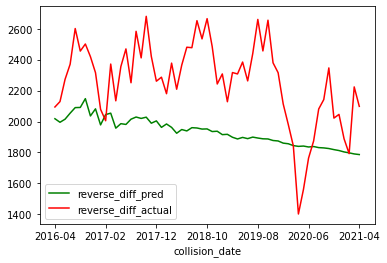

In [82]:
truck_collision_test['reverse_diff_pred'].plot(color='green')
truck_collision_test['reverse_diff_actual'].plot(color='red')
plt.legend(["reverse_diff_pred", "reverse_diff_actual"]);
#We can observed on the plot that Months the are greatly affected by covid deviate from the forecasted value

In [84]:
# Forecasting for 12 Months
month_forecast = 12

AutoReg_Truck_yhat = AutoReg_model_Truck_fit.predict(len(truck_collision_train.index), len(truck_collision_train.index)+len(truck_collision_test.index)+ month_forecast-1)
AutoReg_Truck_yhat = AutoReg_Truck_yhat.to_frame()
AutoReg_Truck_yhat = AutoReg_Truck_yhat.rename(columns={0 : 'truck_collision'})
AutoReg_Truck_yhat.reset_index(inplace=True)
AutoReg_Truck_yhat['collision_date'] = [d.strftime('%Y-%m') for d in AutoReg_Truck_yhat['index']]
AutoReg_Truck_yhat = AutoReg_Truck_yhat[['collision_date','truck_collision']].set_index('collision_date')

AutoReg_Truck_yhat = pd.concat([truck_collision_cum_initial_number, AutoReg_Truck_yhat])
AutoReg_Truck_yhat['truck_collision'] = round(AutoReg_Truck_yhat['truck_collision'].cumsum())

print(AutoReg_Truck_yhat)

                truck_collision
collision_date                 
2016-03                  2192.0
2016-04                  2018.0
2016-05                  1995.0
2016-06                  2015.0
2016-07                  2054.0
...                         ...
2021-12                  1753.0
2022-01                  1745.0
2022-02                  1740.0
2022-03                  1734.0
2022-04                  1730.0

[74 rows x 1 columns]


C:\Users\ASHNER_NOVILLA\anaconda3\envs\tensorgpu\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


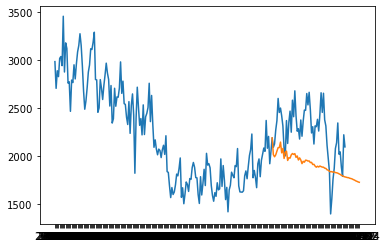

In [85]:
plt.plot(grp_truck_collision_filtered['truck_collision'])
plt.plot(AutoReg_Truck_yhat['truck_collision'])

# Total Collision Prediction

In [87]:
## Total_Collision Prediction
AutoReg_model_Total = AutoReg(total_collision_train['Total_Collision'], lags=12)
AutoReg_model_Total_fit = AutoReg_model_Total.fit()

# make prediction
AutoReg_Total_yhat = AutoReg_model_Total_fit.predict(len(total_collision_train['Total_Collision']), len(total_collision_train['Total_Collision'])+len(total_collision_test['Total_Collision'])-1)

AutoReg_Total_yhat = AutoReg_Total_yhat.to_frame()
AutoReg_Total_yhat = AutoReg_Total_yhat.rename(columns={0 : 'Total_Collision'})
AutoReg_Total_yhat.reset_index(inplace=True)
AutoReg_Total_yhat['collision_date'] = [d.strftime('%Y-%m') for d in AutoReg_Total_yhat['index']]
AutoReg_Total_yhat = AutoReg_Total_yhat[['collision_date','Total_Collision']].set_index('collision_date')

print(AutoReg_Total_yhat)
# As seen the predicted values are not yet revert to inverse difference


                Total_Collision
collision_date                 
2016-04             -269.561418
2016-05             -414.135373
2016-06              111.901266
2016-07              399.398596
2016-08              389.288897
...                         ...
2020-12                1.902459
2021-01               -6.889833
2021-02              -37.620425
2021-03             -100.982430
2021-04             -101.025072

[61 rows x 1 columns]


C:\Users\ASHNER_NOVILLA\anaconda3\envs\tensorgpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASHNER_NOVILLA\anaconda3\envs\tensorgpu\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
C:\Users\ASHNER_NOVILLA\anaconda3\envs\tensorgpu\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


In [88]:
#Reverse the Actual Result
total_collision_test['reverse_diff_actual'] = grp_total_collision_filtered['Total_Collision'].shift(1) + total_collision_test['Total_Collision']

#Reverse the Predicted Result
#Get the Initail Number of the original dataset for cummulative sum to reverse difference method
total_collision_cum_initial_number = pd.DataFrame(grp_total_collision_filtered.iloc[train_test_var::,0:1]['Total_Collision'].head(1))

df = pd.concat([total_collision_cum_initial_number, AutoReg_Total_yhat])
df['Total_Collision'] = round(df['Total_Collision'].cumsum())

#Combine the Actual and Predicted and remove unused column and dataframe
total_collision_test['reverse_diff_pred'] = df['Total_Collision']
total_collision_test = total_collision_test[['reverse_diff_actual', 'reverse_diff_pred']]
del(df)

In [89]:
total_collision_test

,reverse_diff_actual,reverse_diff_pred
collision_date,,
2016-04,5752.0,5676.0
2016-05,5963.0,5262.0
2016-06,6079.0,5374.0
2016-07,6234.0,5774.0
2016-08,6656.0,6163.0
...,...,...
2020-12,4546.0,5795.0
2021-01,4062.0,5788.0
2021-02,3847.0,5750.0


In [90]:
mean_absolute_percentage_error(total_collision_test['reverse_diff_actual'], total_collision_test['reverse_diff_pred'])

13.196310456063454

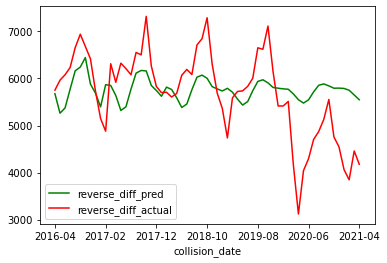

In [91]:
total_collision_test['reverse_diff_pred'].plot(color='green')
total_collision_test['reverse_diff_actual'].plot(color='red')
plt.legend(["reverse_diff_pred", "reverse_diff_actual"]);
#We can observed on the plot that Months the are greatly affected by covid deviate from the forecasted value

In [94]:
# Forecasting for 12 Months
month_forecast = 24

AutoReg_Total_yhat = AutoReg_model_Total_fit.predict(len(total_collision_train.index), len(total_collision_train.index)+len(total_collision_test.index)+ month_forecast-1)
AutoReg_Total_yhat = AutoReg_Total_yhat.to_frame()
AutoReg_Total_yhat = AutoReg_Total_yhat.rename(columns={0 : 'Total_Collision'})
AutoReg_Total_yhat.reset_index(inplace=True)
AutoReg_Total_yhat['collision_date'] = [d.strftime('%Y-%m') for d in AutoReg_Total_yhat['index']]
AutoReg_Total_yhat = AutoReg_Total_yhat[['collision_date','Total_Collision']].set_index('collision_date')

AutoReg_Total_yhat = pd.concat([total_collision_cum_initial_number, AutoReg_Total_yhat])
AutoReg_Total_yhat['Total_Collision'] = round(AutoReg_Total_yhat['Total_Collision'].cumsum())

print(AutoReg_Total_yhat)

                Total_Collision
collision_date                 
2016-03                  5946.0
2016-04                  5676.0
2016-05                  5262.0
2016-06                  5374.0
2016-07                  5774.0
...                         ...
2022-12                  5767.0
2023-01                  5757.0
2023-02                  5706.0
2023-03                  5625.0
2023-04                  5560.0

[86 rows x 1 columns]


C:\Users\ASHNER_NOVILLA\anaconda3\envs\tensorgpu\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


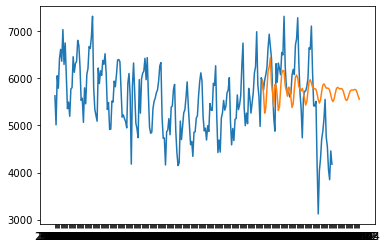

In [95]:
plt.plot(grp_total_collision_filtered['Total_Collision'])
plt.plot(AutoReg_Total_yhat['Total_Collision'])

In [ ]:
# Note: Model Can Be Improved by using different Forecasting Techniques Such as fbProphet, Nueral FBProhet and ANN
# Multiple Typecasting and Imputation can also be performed to reduce the MAPE.
# Thank You